# Time Series Analysis Project
### Part 3: Forecast trend data for the next calendar year using Facebook Prophet
### Written By Ali Chen

### Import Packages

In [1]:
from fbprophet import Prophet
import pandas as pd 

hulu = pd.read_csv('hulu.googletrends.csv', parse_dates=['period'])

In [2]:
#Examine first few rows of Hulu data set
hulu.head()

,Unnamed: 0,date,value,period,onedifvalue
0,0,Oct 07 2013,8315.286004,2013-10-07,NaN
1,1,Oct 08 2013,4946.639643,2013-10-08,-3368.646360
2,2,Oct 09 2013,4251.535654,2013-10-09,-695.103989
3,3,Oct 10 2013,7202.183136,2013-10-10,2950.647481
4,4,Oct 11 2013,7357.478661,2013-10-11,155.295525


### Initiate Dataframe for Facebook Prophet 

In [3]:
#Specify pandas dataframe format
prophetdataframe = pd.DataFrame()

In [4]:
#Specify parameters to Facebook Prophet
#ds = datestamp (Hulu data stored in period column)
#y = time series data (Hulu data stored in value column)
prophetdataframe['ds'] = hulu['period']
prophetdataframe['y'] = hulu['value']

In [5]:
#Examine first few rows of Prophet dataframe
prophetdataframe.head()

,ds,y
0,2013-10-07,8315.286004
1,2013-10-08,4946.639643
2,2013-10-09,4251.535654
3,2013-10-10,7202.183136
4,2013-10-11,7357.478661


### Initiate Facebook Prophet Model

In [6]:
#Model = Prophet
m = Prophet()

In [7]:
#Use fit functionality to fit data to the model
#In this case, our model does not neet any more parameters other than the data set itself
m.fit(prophetdataframe)

#Disregard warning below (this issue does not effect modeling)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
#Fit future data to calculate the best estimates for the next 365 days
#Set dataframe period for the next 365 days
future = m.make_future_dataframe(periods=365)

In [9]:
#Inspect last few rows of future dataframe
future.tail()

,ds
2181,2019-09-27
2182,2019-09-28
2183,2019-09-29
2184,2019-09-30
2185,2019-10-01


### Initiate Forecast Model to Predict Trend Data for Next Calendar Year

In [10]:
#Model = Predict
forecast = m.predict(future)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


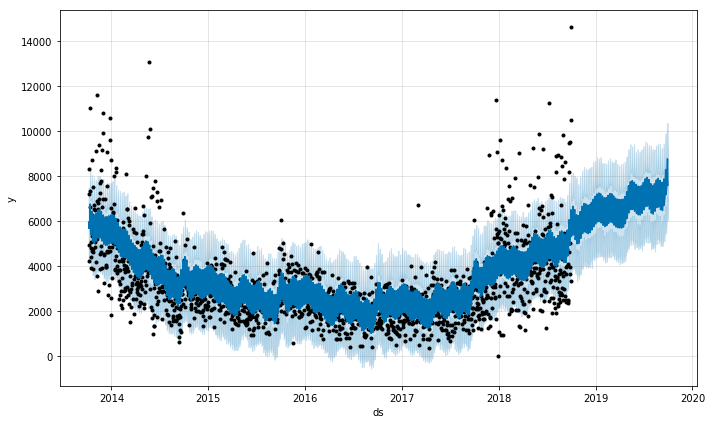

In [11]:
#Plot forecast model
fig1 = m.plot(forecast)
#Light blue = confidence interval at 95% (note: we want to see observed values lie in the light blue)
#Dark blue = error (note: we want to minimize dark blue)

### Plotting Forecast Model Components: Trend, Weekly, and Yearly

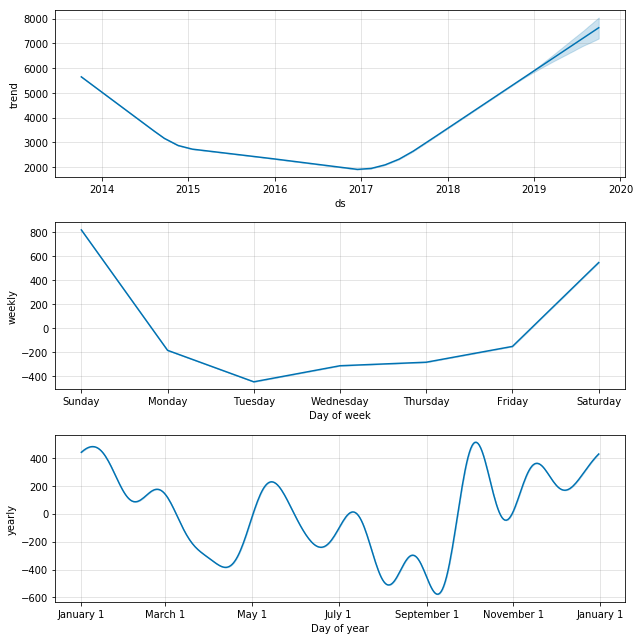

In [12]:
#Plot components of forecast model
#Three subplots: trend, weekly, yearly 
fig2 = m.plot_components(forecast)
#Note: blue shaded line at the end is the forecasting (prediction with our model)

In [13]:
#Examine last few rows of forecast dataframe
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2181,2019-09-27,7605.603074,6084.277078,9361.794207,7178.761860,8012.011809,79.510029,79.510029,79.510029,-149.725666,-149.725666,-149.725666,229.235695,229.235695,229.235695,0.0,0.0,0.0,7685.113104
2182,2019-09-28,7611.976356,6891.371923,10163.272399,7183.133538,8020.160576,833.477973,833.477973,833.477973,548.479133,548.479133,548.479133,284.998840,284.998840,284.998840,0.0,0.0,0.0,8445.454329
2183,2019-09-29,7618.349638,7111.744550,10373.485028,7187.505215,8028.551289,1156.132054,1156.132054,1156.132054,820.107510,820.107510,820.107510,336.024544,336.024544,336.024544,0.0,0.0,0.0,8774.481692
2184,2019-09-30,7624.722920,6129.888322,9407.332921,7191.876892,8037.460877,199.196032,199.196032,199.196032,-182.359828,-182.359828,-182.359828,381.555860,381.555860,381.555860,0.0,0.0,0.0,7823.918952
2185,2019-10-01,7631.096202,6043.829559,9125.693043,7196.248569,8045.266627,-23.477917,-23.477917,-23.477917,-444.421697,-444.421697,-444.421697,420.943780,420.943780,420.943780,0.0,0.0,0.0,7607.618284


### Addressing Residuals

In [14]:
#Create new dataframe for "erroranalysis" to calculate residuals
erroranalysis = m.predict(prophetdataframe)

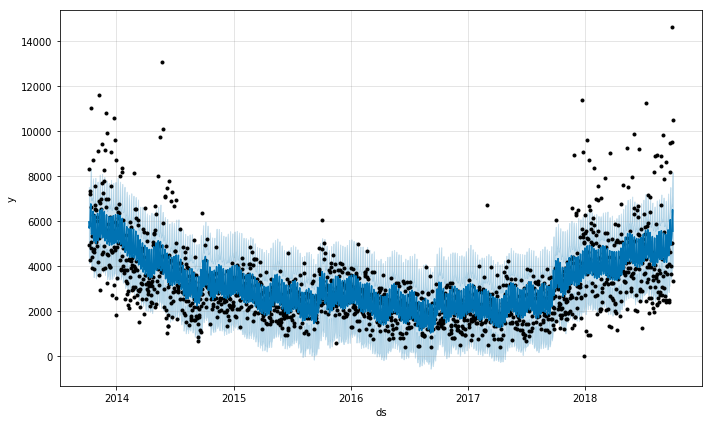

In [15]:
fig3 = m.plot(erroranalysis)

In [16]:
#Specify observed values from Y variable
erroranalysis['value'] = prophetdataframe['y']
#Create residuals column (actual observed value - predicted value)
erroranalysis['residuals']= erroranalysis['value'] - erroranalysis['yhat']
#Create absolute value of residuals column using abs() function
erroranalysis['absoluteresiduals'] = abs(erroranalysis['residuals'])

In [17]:
#Examine first few rows of "erroranalysis" dataframe
erroranalysis.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,value,residuals,absoluteresiduals
0,2013-10-07,5647.525893,4447.486940,7508.965455,5647.525893,5647.525893,321.526622,321.526622,321.526622,-182.359828,...,503.886450,503.886450,503.886450,0.0,0.0,0.0,5969.052515,8315.286004,2346.233488,2346.233488
1,2013-10-08,5640.384170,4137.400589,7260.710796,5640.384170,5640.384170,45.583815,45.583815,45.583815,-444.421697,...,490.005512,490.005512,490.005512,0.0,0.0,0.0,5685.967985,4946.639643,-739.328342,739.328342
2,2013-10-09,5633.242448,4311.441639,7311.240955,5633.242448,5633.242448,159.250957,159.250957,159.250957,-310.703751,...,469.954709,469.954709,469.954709,0.0,0.0,0.0,5792.493405,4251.535654,-1540.957751,1540.957751
3,2013-10-10,5626.100725,4214.977488,7323.095466,5626.100725,5626.100725,162.983811,162.983811,162.983811,-281.375699,...,444.359511,444.359511,444.359511,0.0,0.0,0.0,5789.084536,7202.183136,1413.098600,1413.098600
4,2013-10-11,5618.959002,4417.316474,7444.843934,5618.959002,5618.959002,264.217885,264.217885,264.217885,-149.725666,...,413.943551,413.943551,413.943551,0.0,0.0,0.0,5883.176887,7357.478661,1474.301774,1474.301774


In [18]:
#Create new variable "total_error" which is sum of absolute value of residuals
total_error = erroranalysis['absoluteresiduals'].sum()

In [19]:
#Print value of total_error
#Total error of model = 1581196.1869229889 (SSE of time series)
print(total_error)

1581196.1869229889


In [20]:
#Average prediction mean error = 868 units
#Note: on average, by day, my model is off by 868 Google Trend Units
mean_error = print(total_error/len(erroranalysis))
mean_error

868.312019177918


In [21]:
#Summary output of residuals dataframe
erroranalysis['value'].describe()
#Mean = 3118.138441
#Standard deviation = 1707.584901

count     1821.000000
mean      3118.138441
std       1707.584901
min          0.000000
25%       1999.465262
50%       2722.995997
75%       3747.288782
max      14630.786184
Name: value, dtype: float64